MLOps. Практическое задание №5

Антропова Н.Г.

ЦЕЛЬ ЗАДАНИЯ:
Применить средства автоматизации тестирования python для автоматического тестирования качества работы модели машинного обучения на различных датасетах.

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

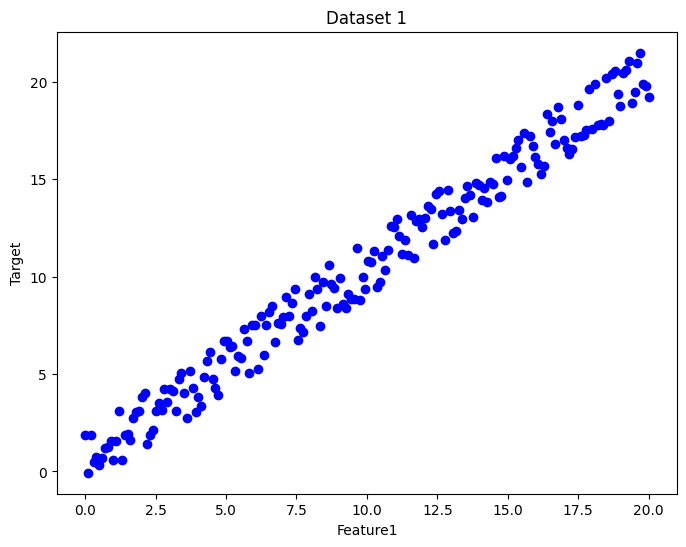

In [2]:
# Dataset 1: линейная зависимость
X1 = np.linspace(0, 20, 200).reshape(-1, 1)
y1 = X1 + np.random.random((200, 1))*3 - 1
df1 = pd.DataFrame(data=X1, columns=['Feature1'])
df1['Target'] = y1

# Визуализация Dataset 1
plt.figure(figsize=(8, 6))
plt.scatter(df1['Feature1'], df1['Target'], color='blue')
plt.title('Dataset 1')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.show()

Создаём три датасета с «качественными данными», на которых можно обучить простую модель линейной регрессии.

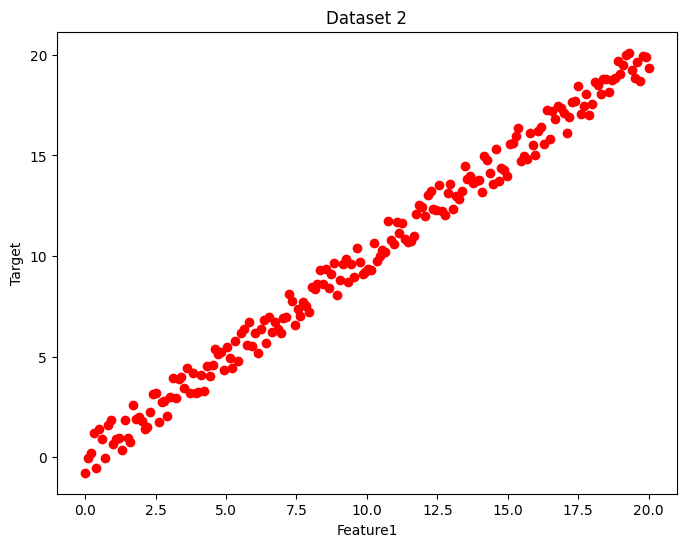

In [3]:
# Dataset 2: линейная зависимость
X2 = np.linspace(0, 20, 200).reshape(-1, 1)
y2 = X2 + np.random.random((200,1))*2 - 1
df2 = pd.DataFrame(data=X2, columns=['Feature1'])
df2['Target'] = y2

# Визуализация Dataset 2
plt.figure(figsize=(8, 6))
plt.scatter(df2['Feature1'], df2['Target'], color='red')
plt.title('Dataset 2')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.show()

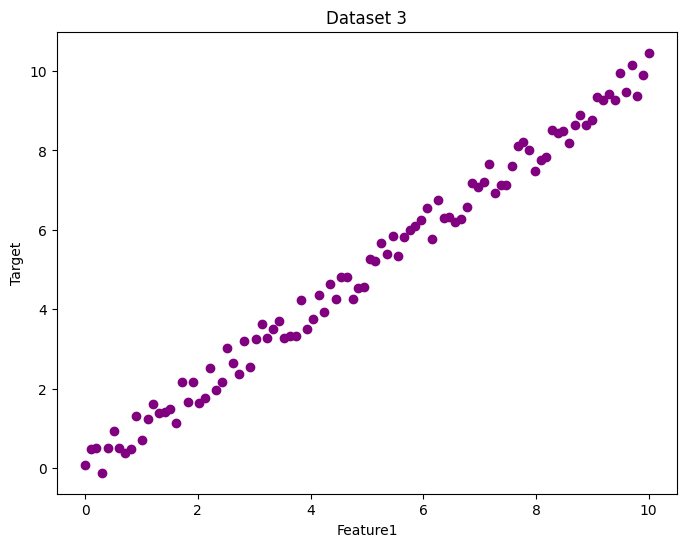

In [4]:
# Dataset 3: линейная зависимость
X3 = np.linspace(0, 10, 100).reshape(-1, 1)
y3 = X3 + np.random.random((100, 1))*1 - 0.5
df3 = pd.DataFrame(data=X3, columns=['Feature1'])
df3['Target'] = y3

# Визуализация Dataset 3
plt.figure(figsize=(8, 6))
plt.scatter(df3['Feature1'], df3['Target'], color='purple')
plt.title('Dataset 3')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.show()

Обучаем модель линейной регрессии на наборе данных Dataset 3.

Mean squared error: 0.09
R-squared (R2) Score: 0.99


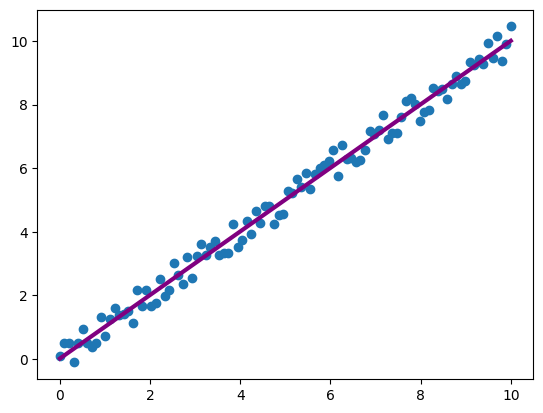

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели на третьем датасете
model3 = LinearRegression()
model3.fit(df3['Feature1'].values.reshape(-1, 1), df3['Target'])

# Предсказание модели
approx3 = model3.predict(df3['Feature1'].values.reshape(-1, 1))

# Вычисление среднеквадратичной ошибки и R2-оценки
print('Mean squared error: %.2f' % mean_squared_error(df3['Target'], approx3))
print('R-squared (R2) Score: %.2f' % r2_score(df3['Target'], approx3))

# Визуализация результатов
plt.scatter(df3['Feature1'], df3['Target'])
plt.plot(df3['Feature1'], approx3, color='purple', linewidth=3)
plt.show()

Создаём датасет с шумом в данных, добавим выбросы.

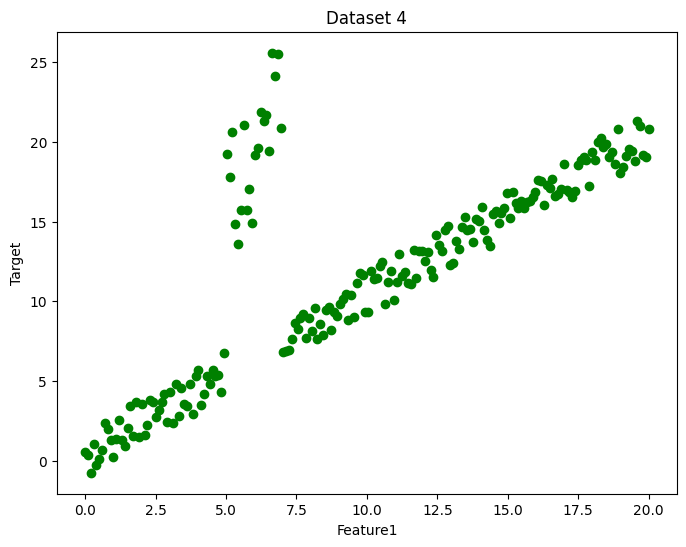

In [8]:
# Dataset 4: линейная зависимость с шумом и выбросами
X4 = np.linspace(0, 20, 200).reshape(-1, 1)
y4 = X4 + np.random.random((200, 1))*3 - 1

# Добавляем выбросы
y4[50:70] *= 3

# DataFrame для удобства визуализации
df4 = pd.DataFrame(data=X4, columns=['Feature1'])
df4['Target'] = y4

# Визуализация Dataset 4
plt.figure(figsize=(8, 6))
plt.scatter(df4['Feature1'], df4['Target'], color='green')
plt.title('Dataset 4')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.show()

Устанавливаем pytest.

In [9]:
!pip install pytest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Запишем модель и датасеты в файлы.

In [10]:
import pickle

# Сохраняем модель в файл
with open('model3.pkl', 'wb') as f:
    pickle.dump(model3, f)

# Сохраняем датасеты в файлы
df1.to_csv('dataset1.csv', index=False)
df2.to_csv('dataset2.csv', index=False)
df3.to_csv('dataset3.csv', index=False)
df4.to_csv('dataset4.csv', index=False)

Напишем тесты с использованием pytest, которые будут проверять, что среднеквадратичная ошибка (MSE) не превышает 2, и что R2-оценка находится в диапазоне от 0 до 1.

Проверка модели на наборе данных Dataset 1:

In [11]:
%%writefile test_data1.py
import pytest
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Загружаем модель из файла
with open('model3.pkl', 'rb') as f:
    model = pickle.load(f)

# Загружаем датасет из файла
df1 = pd.read_csv('dataset1.csv')

def test_dataset1():
    # Предсказание модели
    approx = model.predict(df1['Feature1'].values.reshape(-1, 1))

    # Вычисление среднеквадратичной ошибки и R2-оценки
    mse = mean_squared_error(df1['Target'], approx)
    r2 = r2_score(df1['Target'], approx)

    # Проверка, что mse не превышает 2
    assert mse <= 2, f'Dataset 1: MSE is {mse}, что больше допустимого значения [2]'

    # Проверка, что r2 находится в диапазоне от 0 до 1
    assert 0 <= r2 <= 1, f'Dataset 1: R2 score is {r2}, что не находится в допустимом диапазоне [0, 1]'

test_dataset1()

Writing test_data1.py


In [12]:
!pytest test_data1.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content
plugins: anyio-3.7.0
collected 1 item                                                               

test_data1.py .                                                          [100%]

============================== 1 passed in 1.20s ===============================


Проверка модели на наборе данных Dataset 2:

In [13]:
%%writefile test_data2.py
import pytest
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Загружаем модель из файла
with open('model3.pkl', 'rb') as f:
    model = pickle.load(f)

# Загружаем датасет из файла
df2 = pd.read_csv('dataset2.csv')

def test_dataset2():
    # Предсказание модели
    approx = model.predict(df2['Feature1'].values.reshape(-1, 1))

    # Вычисление среднеквадратичной ошибки и R2-оценки
    mse = mean_squared_error(df2['Target'], approx)
    r2 = r2_score(df2['Target'], approx)

    # Проверка, что mse не превышает 2
    assert mse <= 2, f'Dataset 2: MSE is {mse}, что больше допустимого значения [2]'

    # Проверка, что r2 находится в диапазоне от 0 до 1
    assert 0 <= r2 <= 1, f'Dataset 2: R2 score is {r2}, что не находится в допустимом диапазоне [0, 1]'

test_dataset2()

Writing test_data2.py


In [14]:
!pytest test_data2.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content
plugins: anyio-3.7.0
collected 1 item                                                               

test_data2.py .                                                          [100%]

============================== 1 passed in 1.46s ===============================


Проверка модели на наборе данных Dataset 3:

In [15]:
%%writefile test_data3.py
import pytest
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Загружаем модель из файла
with open('model3.pkl', 'rb') as f:
    model = pickle.load(f)

# Загружаем датасет из файла
df3 = pd.read_csv('dataset3.csv')

def test_dataset3():
    # Предсказание модели
    approx = model.predict(df3['Feature1'].values.reshape(-1, 1))

    # Вычисление среднеквадратичной ошибки и R2-оценки
    mse = mean_squared_error(df3['Target'], approx)
    r2 = r2_score(df3['Target'], approx)

    # Проверка, что mse не превышает 2
    assert mse <= 2, f'Dataset 3: MSE is {mse}, что больше допустимого значения [2]'

    # Проверка, что r2 находится в диапазоне от 0 до 1
    assert 0 <= r2 <= 1, f'Dataset 3: R2 score is {r2}, что не находится в допустимом диапазоне [0, 1]'

test_dataset3()


Writing test_data3.py


In [16]:
!pytest test_data3.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content
plugins: anyio-3.7.0
collected 1 item                                                               

test_data3.py .                                                          [100%]

============================== 1 passed in 0.71s ===============================


Проверка модели на наборе данных Dataset 4:

In [17]:
%%writefile test_data4.py
import pytest
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Загружаем модель из файла
with open('model3.pkl', 'rb') as f:
    model = pickle.load(f)

# Загружаем датасет из файла
df4 = pd.read_csv('dataset4.csv')

def test_dataset4():
    # Предсказание модели
    approx = model.predict(df4['Feature1'].values.reshape(-1, 1))

    # Вычисление среднеквадратичной ошибки и R2-оценки
    mse = mean_squared_error(df4['Target'], approx)
    r2 = r2_score(df4['Target'], approx)

    # Проверка, что mse не превышает 2
    assert mse <= 2, f'Dataset 4: MSE is {mse}, что больше допустимого значения [2]'

    # Проверка, что r2 находится в диапазоне от 0 до 1
    assert 0 <= r2 <= 1, f'Dataset 4: R2 score is {r2}, что не находится в допустимом диапазоне [0, 1]'

test_dataset4()


Writing test_data4.py


In [18]:
!pytest test_data4.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content
plugins: anyio-3.7.0
collected 0 items / 1 error                                                    

==================================== ERRORS ====================================
________________________ ERROR collecting test_data4.py ________________________
test_data4.py:28: in <module>
    test_dataset4()
test_data4.py:23: in test_dataset4
    assert mse <= 2, f'Dataset 4: MSE is {mse}, что больше допустимого значения [2]'
E   AssertionError: Dataset 4: MSE is 20.00333777763831, что больше допустимого значения [2]
E   assert 20.00333777763831 <= 2
=========================== short test summary info ============================
ERROR test_data4.py - AssertionError: Dataset 4: MSE is 20.00333777763831, что больше допустимого...
!!!!!!!!!!!!!!!!!!!! Interrupted: 1 error during collection !!!!!!!!!!!!!!!!!!!!
================

По результатам тестирования датасета 4 мы видим, что тест не прошел, что ожидаемо, так как этот датасет содержит шумы и выбросы. Среднеквадратичная ошибка (MSE) составляет 20.00333777763831, что значительно превышает установленный порог в 2.

Модель, обученная на третьем датасете, не обобщает данные датасета 4 достаточно хорошо из-за наличия шумов и выбросов в данных. Для улучшения результатов на таких данных потребуется использование более сложных моделей или применение методов для обработки выбросов и шумов в данных.

Результаты тестирования помогают нам оценить производительность модели на разных датасетах и выявить ограничения модели в разных сценариях использования. Это позволяет нам принимать решения о дальнейших улучшениях модели или выборе более подходящих алгоритмов для различных типов данных.